# Estimate Sobol’ indices for the Ishigami function by a sampling method: a quick start guide to sensitivity analysis

### Analyse de la fonction Ishigami avec l'ensemble de codes dévelopés pour l'analyse de sensibilité sur les cahmps stochastiques.

#### Comparaison et corréctions

La même logique d'écriture de codes est utilisée que dans le script 'Demo Analyse de sensibilité poutre' : https://openturns.github.io/openturns/master/examples/reliability_sensitivity/sensitivity_sobol.html

In [1]:
import sys
sys.path.insert(0, '../')
# Voici les deux scripts destinés à gérer l'analyse de sensibilité sur les champs stochastiques
import StochasticProcessSensitivity as ngps
import StochasticProcessConstructor as ngpc
import StochasticProcessSensitivityIndices as ngpsi
# Classes utilitaires
import numpy                        as np
import openturns                    as ot
from   importlib                import reload 

In [2]:
# This is the formula used in the openTURNS example. 
formula = ['sin(X1) + 7. * sin(X2)^2 + .1 * X3^4 * sin(X1)']
input_names = ['X1', 'X2', 'X3']
g = ot.SymbolicFunction(input_names, formula)

# we have to modifiy the function, be cause it takes as an input a random vector, un-correlated
# in the case of our method, un-correlated inputs are clearly distinct. 
def gMod(X1,X2,X3):
    X = np.stack([X1,X2,X3]).T
    return g(X)

In [3]:
X = np.random.uniform(-np.pi,np.pi,[10,3])
assert gMod(X[...,0], X[...,1], X[...,2]) == g(X) ,""

Maintenant nous définissons nos variables d'entrée, avec les fonctions contenues dans notre méthode 

In [4]:
reload(ngpc)
reload(ngps)
lower  = -np.pi
upper  = np.pi
nameX1, nameX2, nameX3 = 'X1', 'X2', 'X3'
RV_X1 = ot.Uniform(lower,upper)
RV_X1.setName(nameX1)
RV_X2 = ot.Uniform(lower,upper)
RV_X2.setName(nameX2)
RV_X3 = ot.Uniform(lower,upper)
RV_X3.setName(nameX3)

In [5]:
# here we have to explicitely define our outputs
outputVariables = {'out1_name' :  #any name here is fine
                   {
                         'name'     : 'Y',
                         'position' : 0,   #Position in the ouput, if the output were a list
                         'shape'    : (1,)  
                    },
                  }

In [6]:
inputList    = [RV_X1, RV_X2, RV_X3]
soloFunction = sampleFunction = gMod #Easy in this case
size         = 1000


In [7]:
processSensitivityAnalysis = ngps.StochasticProcessSensitivityAnalysis(inputList, 
                                                                       outputVariables,
                                                                       sampleFunction,
                                                                       soloFunction,
                                                                       size)

Input Variables are (without Karhunen Loeve Decomposition) :
 X1 X2 X3 

Output Variables are :
 ['Y'] 

Composed distribution built with processes and distributions: X1; X2; X3
Program initialised, ready for sensitivity analysis. You can now proceed to prepare the Sobol indices experiment



In [8]:
addK2ProcSampprocessSensitivityAnalysis.run(generationType = 2)

Generation types are:
1 : Random (default)
2 : LHS
            3 : LowDiscrepancySequence
4 : SimulatedAnnealingLHS
You choose LHS generation
number of samples for sobol experiment =  5000 

input design shape is:  (5000, 3)
Converting list of outputs into matrix...
Output variable 1 has shape (5000, 1)
Final matrix shape: (5000, 1)
Columns where nan :  [] 


No errors while processing, the function has returned no np.nan.



In [9]:
processSensitivityAnalysis.getSensitivityAnalysisResults()

You have chosen to use the Saltelli method
There are 1 distinct outputs
Implicit dimension = 3
Implicit description: [X0,X1,X2]
There are 3 indices to get in (1,) dimensions with 1 elements
Indices successfully calculated
class=SobolIndicesAlgorithmImplementation name=Y


The output is scalar
The sensitivity is measured accordingly to the 3 input variables, namely:
 X1 and X2 and X3


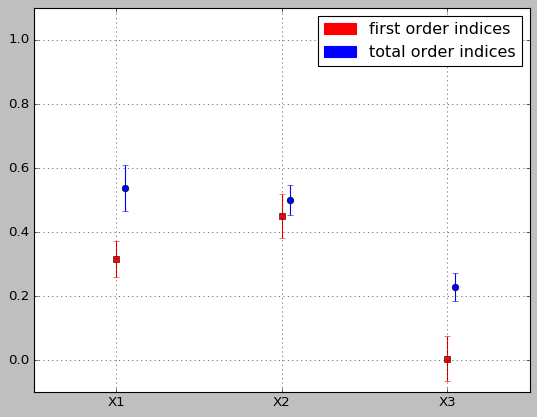

In [10]:
processSensitivityAnalysis.SensitivityAnalysisResults[0].draw()